# <center> Recommendation System on Movie Lens Dataset

## 1. Reading Data

In [1]:
# Jupyter Notebook with Matplotlib Inline
%matplotlib notebook

# Importing necessary modules
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from subprocess import check_output

In [2]:
# Set height, width, maximum rows and columns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
# List of files in the data directory
print(os.listdir("data/"))

['data', 'desktop.ini', 'ml-100k.zip', 'Read Me.txt', 'u.data', 'u.genre', 'u.info', 'u.item', 'u.occupation', 'u.user']


In [4]:
# Reading ratings data
rating_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv('data/u.data', sep='\t', names = rating_cols) 

In [5]:
print(ratings.shape)
ratings.head(5)

(100000, 4)


,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [6]:
# Reading genre data
genre_cols = ['genre', 'genre_id']
genres = pd.read_csv('data/u.genre', sep='|', names = genre_cols) 

In [7]:
print(genres.shape)
genres.head(5)

(19, 2)


,genre,genre_id
0,unknown,0
1,Action,1
2,Adventure,2
3,Animation,3
4,Children's,4


In [8]:
# Reading movies data
movies_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url','unknown', 'Action', 'Adventure',
'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy','Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
movies = pd.read_csv('data/u.item', sep = '|', names = movies_cols,  encoding='latin-1')

In [9]:
print(movies.shape)
movies.head(2).transpose()

(1682, 24)


,0,1
movie_id,1,2
title,Toy Story (1995),GoldenEye (1995)
release_date,01-Jan-1995,01-Jan-1995
video_release_date,NaN,NaN
imdb_url,http://us.imdb.com/M/title-exact?Toy%20Story%2...,http://us.imdb.com/M/title-exact?GoldenEye%20(...
unknown,0,0
Action,0,1
Adventure,0,1
Animation,1,0
Children's,1,0


In [10]:
# Reading users data
user_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('data/u.user', sep='|', names = user_cols) 

In [11]:
print(users.shape)
users.head()

(943, 5)


,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [12]:
# Shape of all the data
for i in [ratings, genres, movies, users]:
    print(i.shape)

(100000, 4)
(19, 2)
(1682, 24)
(943, 5)


In [13]:
movies.head(3).transpose()

,0,1,2
movie_id,1,2,3
title,Toy Story (1995),GoldenEye (1995),Four Rooms (1995)
release_date,01-Jan-1995,01-Jan-1995,01-Jan-1995
video_release_date,NaN,NaN,NaN
imdb_url,http://us.imdb.com/M/title-exact?Toy%20Story%2...,http://us.imdb.com/M/title-exact?GoldenEye%20(...,http://us.imdb.com/M/title-exact?Four%20Rooms%...
unknown,0,0,0
Action,0,1,0
Adventure,0,1,0
Animation,1,0,0
Children's,1,0,0


In [14]:
ratings.head(3).transpose()

,0,1,2
user_id,196,186,22
movie_id,242,302,377
rating,3,3,1
timestamp,881250949,891717742,878887116


In [15]:
users.head(3).transpose()

,0,1,2
user_id,1,2,3
age,24,53,23
sex,M,F,M
occupation,technician,other,writer
zip_code,85711,94043,32067


## 2. Merging Data

In [16]:
# Merging ratings and movies
z = ratings.merge(movies, on = 'movie_id', how = "inner")

In [17]:
z.columns

Index(['user_id', 'movie_id', 'rating', 'timestamp', 'title', 'release_date', 'video_release_date', 'imdb_url', 'unknown', 'Action', 'Adventure', 'Animation', 'Children's', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'], dtype='object')

In [18]:
# Merge combined data and users
z = users.merge(z, on = 'user_id', how = "inner")

In [19]:
# Merge combined data and users
zz = z.copy(deep = True)

In [20]:
# New combined data
zz.head(3).transpose()

,0,1,2
user_id,1,1,1
age,24,24,24
sex,M,M,M
occupation,technician,technician,technician
zip_code,85711,85711,85711
movie_id,242,51,265
rating,5,4,4
timestamp,889751633,878543275,878542441
title,Kolya (1996),Legends of the Fall (1994),"Hunt for Red October, The (1990)"
release_date,24-Jan-1997,01-Jan-1994,01-Jan-1990


In [21]:
zz.shape

(100000, 31)

## 2.1 Data Merge - New Version

In [22]:
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
r_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
m_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url','unknown', 'Action', 'Adventure',
'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy','Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

In [23]:
users_1 = pd.read_csv("data/u.user",sep='|',names=u_cols)
ratings_1 = pd.read_csv('data/u.data',sep='\t', names=r_cols)
movies_1 = pd.read_csv('data/u.item', sep='|', names=m_cols, encoding='latin-1')
movielens=pd.merge(users_1 , ratings_1)
movielens=pd.merge(movielens,movies_1)
movielens.head(3)

,user_id,age,sex,occupation,zip_code,movie_id,rating,timestamp,title,release_date,video_release_date,imdb_url,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,24,M,technician,85711,61,4,878542420,Three Colors: White (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Trzy%20kolory...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,13,47,M,educator,29206,61,4,882140552,Three Colors: White (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Trzy%20kolory...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,18,35,F,other,37212,61,4,880130803,Three Colors: White (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Trzy%20kolory...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


## 3. Data Pre-Processing

In [24]:
# Format 'title' i.e. remove 'year' from title
zz['title'] = zz['title'].astype(str).str[:-7]

In [25]:
zz.title.head()

0                        Kolya
1          Legends of the Fall
2    Hunt for Red October, The
3      Remains of the Day, The
4                 Men in Black
Name: title, dtype: object

## 4. Data Inspection

In [26]:
# Checking for null values in the dataframe
zz.isnull().values.any()

True

In [27]:
# Checking for null values in the columns
zz.isnull().any()

user_id               False
age                   False
sex                   False
occupation            False
zip_code              False
movie_id              False
rating                False
timestamp             False
title                 False
release_date           True
video_release_date     True
imdb_url               True
unknown               False
Action                False
Adventure             False
Animation             False
Children's            False
Comedy                False
Crime                 False
Documentary           False
Drama                 False
Fantasy               False
Film-Noir             False
Horror                False
Musical               False
Mystery               False
Romance               False
Sci-Fi                False
Thriller              False
War                   False
Western               False
dtype: bool

** Note:** Null values are in `release_date`, `video_release_date`, `imdb_url`, the features which are not significant for this project

In [28]:
zz.describe()

,user_id,age,movie_id,rating,timestamp,video_release_date,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,100000.00000,100000.000000,100000.000000,100000.000000,1.000000e+05,0.0,100000.0000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.00000,100000.000000,100000.000000
mean,462.48475,32.969850,425.530130,3.529860,8.835289e+08,NaN,0.0001,0.255890,0.137530,0.036050,0.071820,0.298320,0.080550,0.007580,0.398950,0.013520,0.017330,0.053170,0.049540,0.052450,0.194610,0.12730,0.21872,0.093980,0.018540
std,266.61442,11.562623,330.798356,1.125674,5.343856e+06,NaN,0.0100,0.436362,0.344408,0.186416,0.258191,0.457523,0.272144,0.086733,0.489685,0.115487,0.130498,0.224373,0.216994,0.222934,0.395902,0.33331,0.41338,0.291802,0.134894
min,1.00000,7.000000,1.000000,1.000000,8.747247e+08,NaN,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
25%,254.00000,24.000000,175.000000,3.000000,8.794487e+08,NaN,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
50%,447.00000,30.000000,322.000000,4.000000,8.828269e+08,NaN,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
75%,682.00000,40.000000,631.000000,4.000000,8.882600e+08,NaN,0.0000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
max,943.00000,73.000000,1682.000000,5.000000,8.932866e+08,NaN,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000


## 5. EDA 

### 5.1 Univariate Analysis 

In [29]:
zz.head()

,user_id,age,sex,occupation,zip_code,movie_id,rating,timestamp,title,release_date,video_release_date,imdb_url,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,24,M,technician,85711,242,5,889751633,Kolya,24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,24,M,technician,85711,51,4,878543275,Legends of the Fall,01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Legends%20of%...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1
2,1,24,M,technician,85711,265,4,878542441,"Hunt for Red October, The",01-Jan-1990,NaN,http://us.imdb.com/M/title-exact?Hunt+for+Red+...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1,24,M,technician,85711,86,5,878543541,"Remains of the Day, The",01-Jan-1993,NaN,http://us.imdb.com/M/title-exact?Remains%20of%...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,1,24,M,technician,85711,257,4,874965954,Men in Black,04-Jul-1997,NaN,http://us.imdb.com/M/title-exact?Men+in+Black+...,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


<div class="alert alert-warning">
  <strong>user_id</strong> 
</div>

In [30]:
# Total number of users
len(zz.user_id.unique())

943

<div class="alert alert-warning">
  <strong>age</strong> 
</div>

In [32]:
np.mean(zz['age'])

32.96985

In [33]:
np.sqrt(np.sqrt(len(zz)))

17.782794100389228

<IPython.core.display.Javascript object>


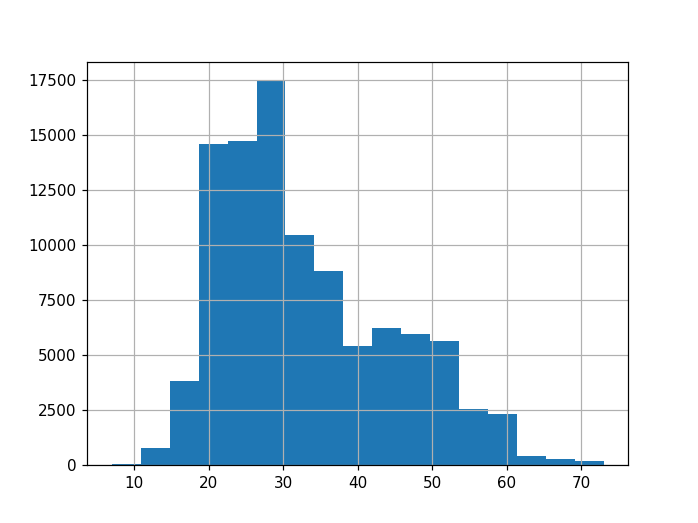

In [34]:
# Plotting distribution of 'age' with sqrt(sqrt(100000)) bins
zz['age'].hist(bins = int(np.sqrt(np.sqrt(len(zz)))))

**Interpretation:** We see from the above graph that distribution is slightly skewed to the right and the data is majorly distributed between 20 and 40.

<div class="alert alert-warning">
  <strong>gender</strong> 
</div>

In [35]:
# Number of observations by gender 
zz.sex.value_counts()

M    74260
F    25740
Name: sex, dtype: int64

** Interpretation:** From the above table of value counts, it is apparent that the data is highly comprised of 'Males' than 'Females' 

<IPython.core.display.Javascript object>


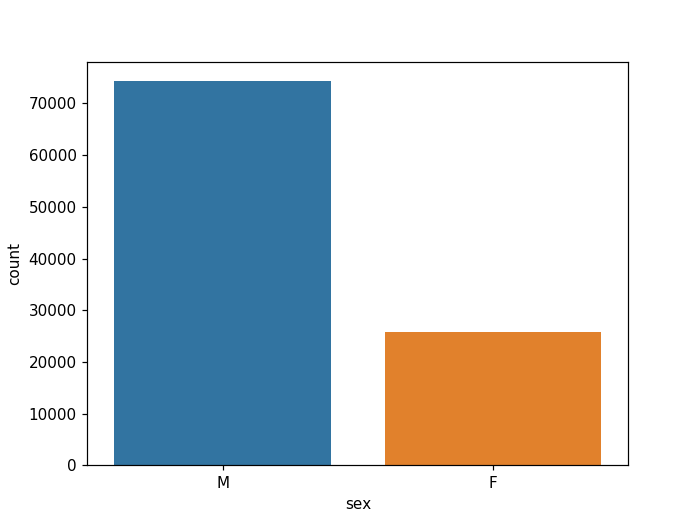

In [36]:
sns.countplot(x="sex", data=zz)

<div class="alert alert-warning">
  <strong>occupation</strong> 
</div>

In [37]:
# Number of observations by gender 
zz.occupation.value_counts()

student          21957
other            10663
educator          9442
engineer          8175
programmer        7801
administrator     7479
writer            5536
librarian         5273
technician        3506
executive         3403
healthcare        2804
artist            2308
entertainment     2095
scientist         2058
marketing         1950
retired           1609
lawyer            1345
none               901
salesman           856
doctor             540
homemaker          299
Name: occupation, dtype: int64

<IPython.core.display.Javascript object>


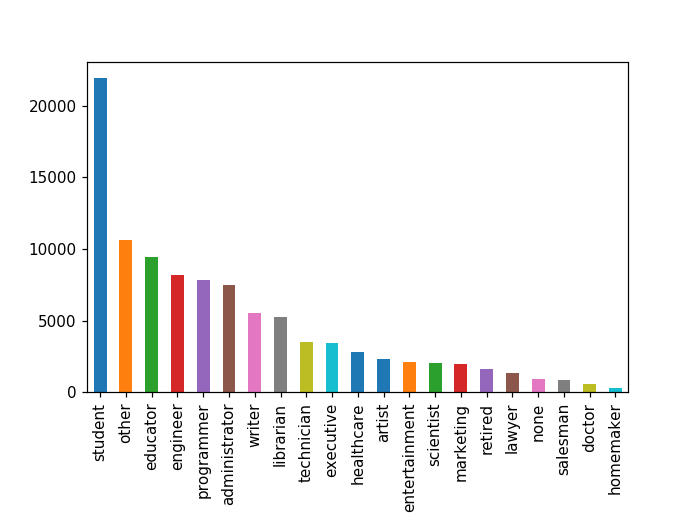

In [38]:
plt.gcf().subplots_adjust(bottom=0.25)
pd.value_counts(zz['occupation']).plot.bar()

<div class="alert alert-warning">
  <strong>movie_id</strong> 
</div>

In [39]:
# Total number of movies
len(zz.movie_id.unique())

1682

<div class="alert alert-warning">
  <strong>rating</strong> 
</div>

In [40]:
np.mean(z['rating'])

3.52986

<IPython.core.display.Javascript object>


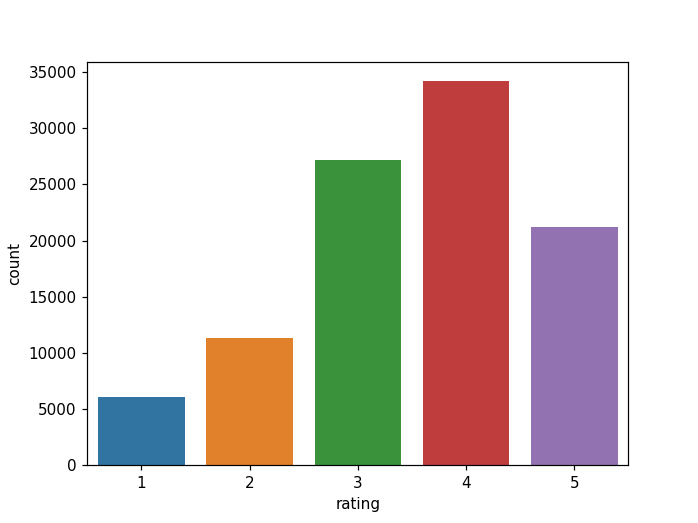

In [41]:
# Ratings and their respective counts
sns.countplot(x = zz.rating, data = zz)

**Interpretation:** From the above plot, it is apparent that most of the user ratings were either 3 or 4.

** Transformation 1 - Replacing ratings with `below_avg`, `avg` and `above_avg`**

In [42]:
# Function to categorize 'rating'
def transformation_1(df):
    df['rating'].replace([1, 2, 3, 4, 5],
                      ['below_avg', 'below_avg', 'avg', 'above_avg', 'above_avg'], 
                      inplace = True)

In [43]:
transformation_1(zz)

In [44]:
zz.rating.head(10)

0    above_avg
1    above_avg
2    above_avg
3    above_avg
4    above_avg
5    above_avg
6          avg
7    below_avg
8    above_avg
9          avg
Name: rating, dtype: object

<div class="alert alert-warning">
  <strong>title</strong> 
</div>

In [45]:
# Top 5 mostly rated movies
zz.title.value_counts().head(5)

Star Wars             583
Contact               509
Fargo                 508
Return of the Jedi    507
Liar Liar             485
Name: title, dtype: int64

In [46]:
# Top 5 least rated movies
zz.title.value_counts().tail(5)

Next Step, The            1
He Walked by Night        1
Good Morning              1
Witness                   1
Someone Else's America    1
Name: title, dtype: int64

<IPython.core.display.Javascript object>


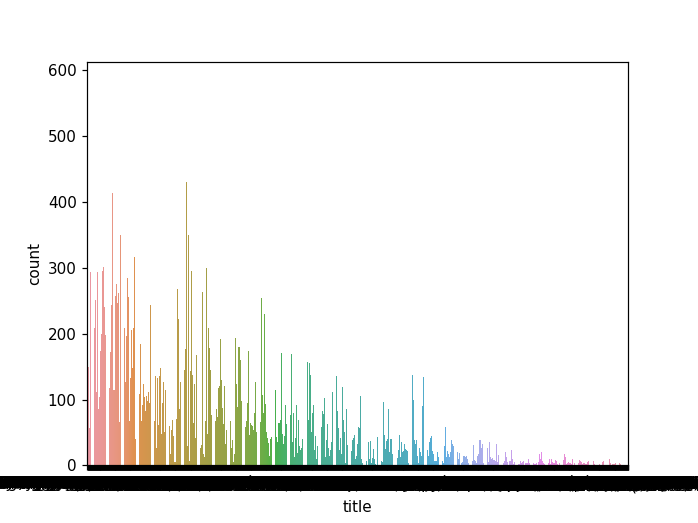

In [48]:
sns.countplot(x="title", data=zz)

** Note:** Movie count is too huge to fit them in one graph

In [49]:
top_movies = zz.groupby('title').size().sort_values(ascending = False)[:10]

In [50]:
top_movies

title
Star Wars                 583
Contact                   509
Fargo                     508
Return of the Jedi        507
Liar Liar                 485
English Patient, The      481
Scream                    478
Toy Story                 452
Air Force One             431
Independence Day (ID4)    429
dtype: int64

**Most rated movies (by count)**

In [51]:
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

<IPython.core.display.Javascript object>


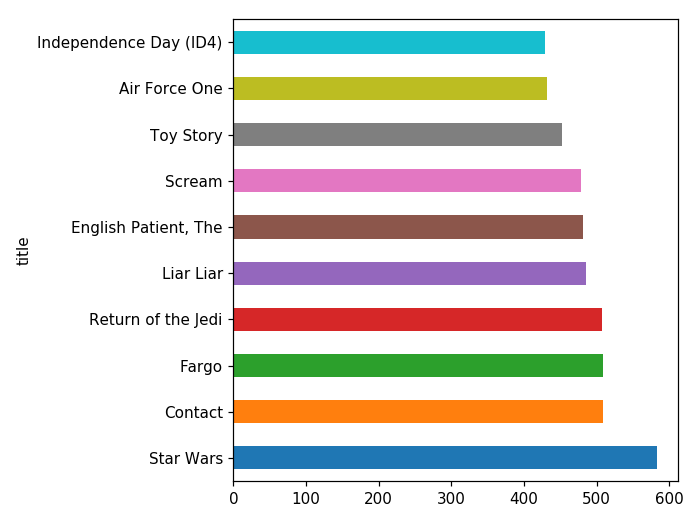

In [52]:
top_movies.plot(kind = 'barh')

In [53]:
# Movies with overall number of ratings = 1 
zz.groupby('title').size().sort_values(ascending = False)[-370:]

title
Loaded                                                                        5
Locusts, The                                                                  5
Hearts and Minds                                                              5
Getting Even with Dad                                                         5
Stonewall                                                                     5
Panther                                                                       5
Heavy                                                                         5
Story of Xinghua, The                                                         5
Of Human Bondage                                                              5
Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La)    5
Stripes                                                                       5
Brother Minister: The Assassination of Malcolm X                              5
Above the Rim                     

In [54]:
# Movies with overall number of ratings = 1 
zz.groupby('title').size().sort_values(ascending = False)[-134:]

title
Wedding Bell Blues                                    1
They Made Me a Criminal                               1
You So Crazy                                          1
War at Home, The                                      1
The Courtyard                                         1
Wings of Courage                                      1
Touki Bouki (Journey of the Hyena)                    1
T-Men                                                 1
Symphonie pastorale, La                               1
Three Lives and Only One Death                        1
Vermont Is For Lovers                                 1
Sweet Nothing                                         1
Tainted                                               1
Window to Paris                                       1
Witness                                               1
Walk in the Sun, A                                    1
Woman in Question, The                                1
Terror in a Texas Town                    

<div class="alert alert-warning">
  <strong>genre</strong> 
</div>

In [55]:
# Dataframe with all genres
all_genres = z.iloc[:, 6: ].drop(['timestamp', 'title', 'release_date', 'video_release_date', 'imdb_url'], axis = 1)

In [56]:
all_genres.head()

,rating,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1
2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,4,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [57]:
all_genres.shape

(100000, 20)

In [58]:
# Multiplying each genre with ratings 
result = all_genres.mul(all_genres['rating'], axis=0)

In [59]:
result = result.drop(['rating'], axis = 1)

In [60]:
result.describe()

,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.00032,0.890560,0.481840,0.128940,0.240830,1.01252,0.292580,0.027840,1.471080,0.043470,0.06796,0.174950,0.174450,0.190820,0.704820,0.453280,0.767490,0.358610,0.066990
std,0.03435,1.621767,1.277046,0.698498,0.918683,1.67361,1.037703,0.334703,1.930016,0.393449,0.52819,0.787406,0.803632,0.848678,1.513179,1.253799,1.540128,1.161664,0.507627
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,1.000000,0.000000,0.000000,0.000000,2.00000,0.000000,0.000000,3.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.00000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


C:\Users\Nishu\Anaconda3\Lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


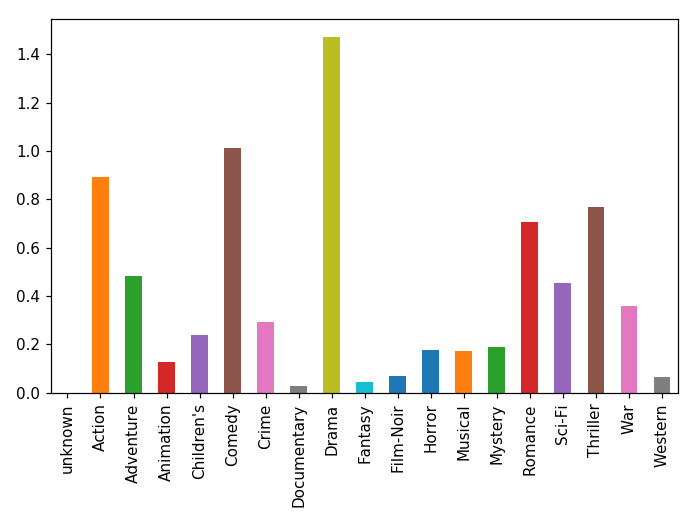

In [61]:
result.describe().ix['mean'].plot(kind='bar')

## 5.2 Bivariate Analysis

### 5.2.1 Genre Count

In [62]:
all_genres.head()

,rating,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1
2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,4,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [63]:
all_genres.columns

Index(['rating', 'unknown', 'Action', 'Adventure', 'Animation', 'Children's', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'], dtype='object')

In [64]:
genre_count = pd.DataFrame(columns=['col','entries'])

In [65]:
col_list = []

In [66]:
list((all_genres.columns))

['rating',
 'unknown',
 'Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

In [67]:
genre_sum = list()

In [68]:
for col in list((all_genres.columns)):
    genre_sum.append(all_genres[col].sum())

In [69]:
genres = list((all_genres.columns))

In [70]:
genre_df = pd.DataFrame({'genres': genres, 'entries': genre_sum})

In [71]:
genre_df.head()

,genres,entries
0,rating,352986
1,unknown,10
2,Action,25589
3,Adventure,13753
4,Animation,3605


<IPython.core.display.Javascript object>


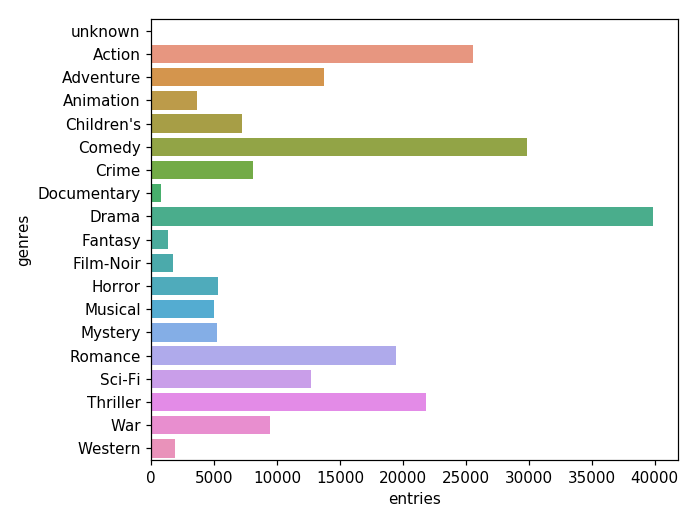

In [72]:
sns.barplot(y='genres', x='entries', data = genre_df.iloc[1:])

### 5.2.2 Multiplying each genre with ratings 

In [73]:
t = z.iloc[:, 1: ].drop(['occupation', 'zip_code', 'movie_id', 'timestamp', 'title', 'release_date', 'video_release_date', 'imdb_url'], axis = 1)

In [74]:
t.iloc[:,3:] = t.iloc[:,3:].mul(t['rating'], axis=0)

In [75]:
t.head()

,age,sex,rating,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,24,M,5,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0
1,24,M,4,0,0,0,0,0,0,0,0,4,0,0,0,0,0,4,0,0,4,4
2,24,M,4,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0
3,24,M,5,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0
4,24,M,4,0,4,4,0,0,4,0,0,0,0,0,0,0,0,0,4,0,0,0


### 5.2.3 Gender vs Age

<IPython.core.display.Javascript object>


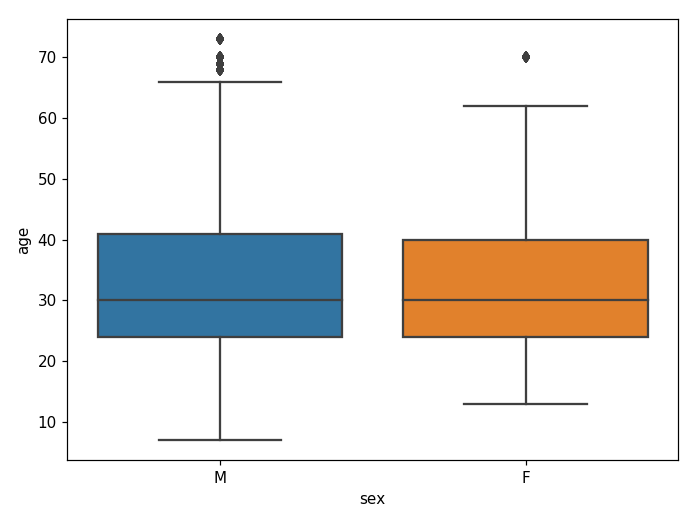

In [76]:
# Gender vs Age
sns.boxplot(x="sex", y="age", data=zz)

### 5.2.3 Gender vs Rating

<IPython.core.display.Javascript object>


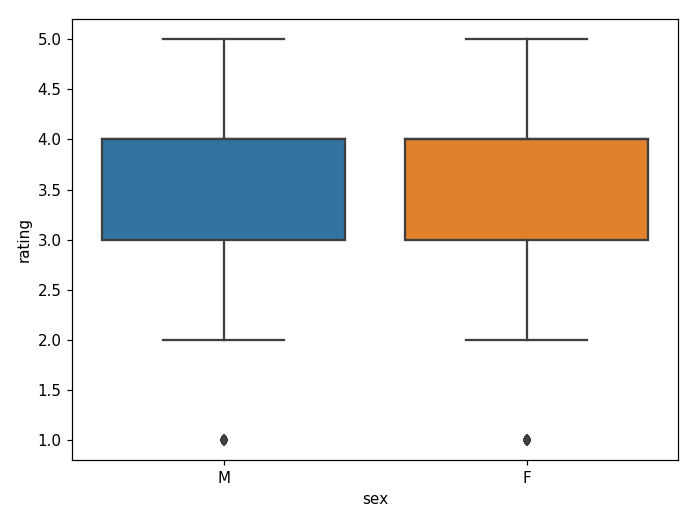

In [77]:
# Gender vs Rating
sns.boxplot(x="sex", y="rating", data=z)
plt.show()

<IPython.core.display.Javascript object>


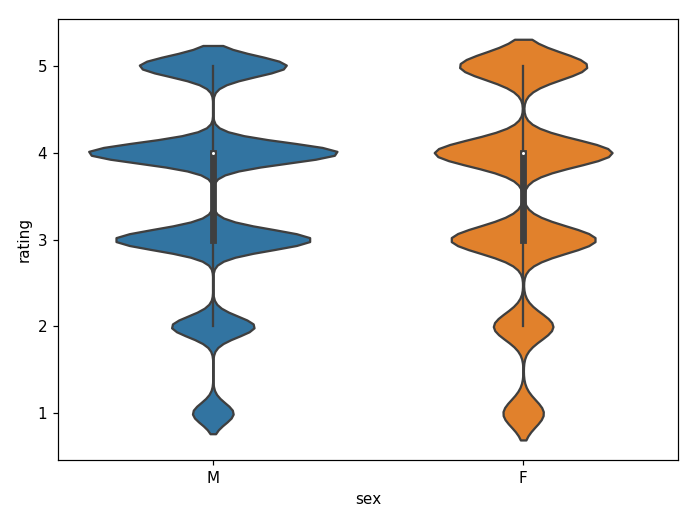

In [78]:
# Gender vs Rating
sns.violinplot(x="sex", y="rating", data=z)

### 5.2.4 Gender vs Rating vs Title

In [79]:
zz.head()

,user_id,age,sex,occupation,zip_code,movie_id,rating,timestamp,title,release_date,video_release_date,imdb_url,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,24,M,technician,85711,242,above_avg,889751633,Kolya,24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,24,M,technician,85711,51,above_avg,878543275,Legends of the Fall,01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Legends%20of%...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1
2,1,24,M,technician,85711,265,above_avg,878542441,"Hunt for Red October, The",01-Jan-1990,NaN,http://us.imdb.com/M/title-exact?Hunt+for+Red+...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1,24,M,technician,85711,86,above_avg,878543541,"Remains of the Day, The",01-Jan-1993,NaN,http://us.imdb.com/M/title-exact?Remains%20of%...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,1,24,M,technician,85711,257,above_avg,874965954,Men in Black,04-Jul-1997,NaN,http://us.imdb.com/M/title-exact?Men+in+Black+...,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [80]:
gen = z[['sex', 'title', 'rating']]

In [81]:
gen.head()

,sex,title,rating
0,M,Kolya (1996),5
1,M,Legends of the Fall (1994),4
2,M,"Hunt for Red October, The (1990)",4
3,M,"Remains of the Day, The (1993)",5
4,M,Men in Black (1997),4


In [82]:
new_gen = gen.pivot_table(index = 'title', columns = 'sex', values = 'rating')

In [83]:
new_gen.head()

sex,F,M
title,,
'Til There Was You (1997),2.200000,2.500000
1-900 (1994),1.000000,3.000000
101 Dalmatians (1996),3.116279,2.772727
12 Angry Men (1957),4.269231,4.363636
187 (1997),3.500000,2.870968


In [84]:
new_gen['diff'] = new_gen['M'] - new_gen['F']

In [85]:
new_gen.head()

sex,F,M,diff
title,,,
'Til There Was You (1997),2.200000,2.500000,0.300000
1-900 (1994),1.000000,3.000000,2.000000
101 Dalmatians (1996),3.116279,2.772727,-0.343552
12 Angry Men (1957),4.269231,4.363636,0.094406
187 (1997),3.500000,2.870968,-0.629032


In [86]:
# Top 10 movies highly rated by Females but not by Males
new_gen.sort_values('diff').head(10)

sex,F,M,diff
title,,,
Loch Ness (1995),4.0,1.000000,-3.000000
Love and Death on Long Island (1997),4.0,1.000000,-3.000000
"Visitors, The (Visiteurs, Les) (1993)",5.0,2.000000,-3.000000
"Lay of the Land, The (1997)",4.0,1.000000,-3.000000
Rough Magic (1995),4.0,1.000000,-3.000000
Faster Pussycat! Kill! Kill! (1965),5.0,2.666667,-2.333333
Chairman of the Board (1998),4.0,1.714286,-2.285714
Two Much (1996),4.0,1.800000,-2.200000
"Simple Wish, A (1997)",3.0,1.000000,-2.000000


<IPython.core.display.Javascript object>


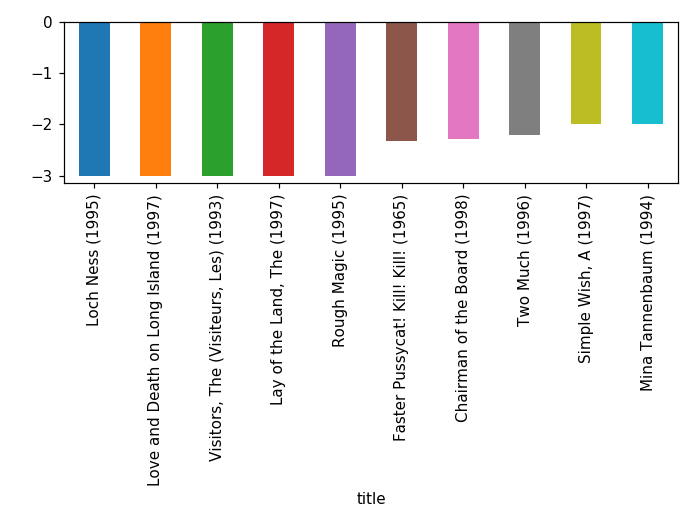

In [87]:
new_gen.sort_values('diff').head(10)['diff'].plot(kind='bar')

In [88]:
# Top 10 movies highly rated by Males but not by Females 
new_gen.sort_values('diff', ascending=False).head(10)

sex,F,M,diff
title,,,
Delta of Venus (1994),1.0,5.000000,4.000000
Two or Three Things I Know About Her (1966),1.0,4.666667,3.666667
Paths of Glory (1957),1.0,4.419355,3.419355
"Magic Hour, The (1998)",1.0,4.250000,3.250000
So Dear to My Heart (1949),1.0,4.000000,3.000000
Spirits of the Dead (Tre passi nel delirio) (1968),1.0,4.000000,3.000000
Little City (1998),2.0,5.000000,3.000000
Aparajito (1956),1.0,4.000000,3.000000
Killer (Bulletproof Heart) (1994),1.0,4.000000,3.000000


<IPython.core.display.Javascript object>


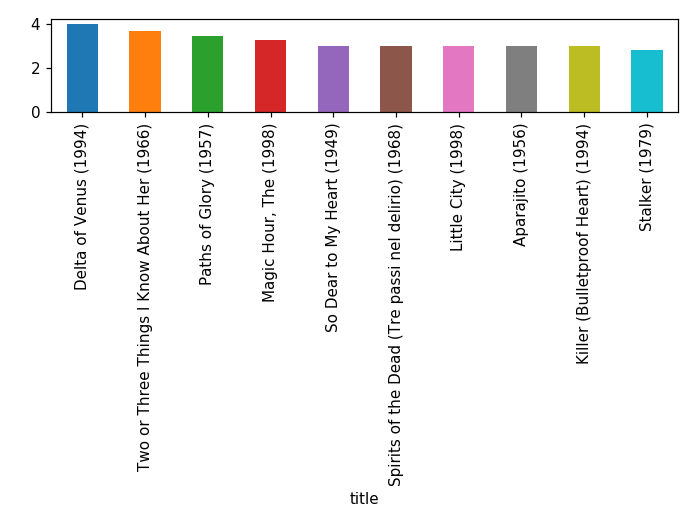

In [89]:
new_gen.sort_values('diff', ascending=False).head(10)['diff'].plot(kind = 'bar')

### 5.2.5 Gender vs Genre

In [258]:
t = z.iloc[:, 1: ].drop(['occupation', 'zip_code', 'movie_id', 'timestamp', 'release_date', 'video_release_date', 'imdb_url'], axis = 1)

In [260]:
# Format 'title' i.e. remove 'year' from title
t['title'] = t['title'].astype(str).str[:-7]

In [262]:
t['title'] = t['title'].fillna("").astype('str')

In [263]:
t.head()

,age,sex,rating,title,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,24,M,5,Kolya,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,24,M,4,Legends of the Fall,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1
2,24,M,4,"Hunt for Red October, The",0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,24,M,5,"Remains of the Day, The",0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,24,M,4,Men in Black,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [264]:
t.iloc[:,3:].head()

,title,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,Kolya,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Legends of the Fall,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1
2,"Hunt for Red October, The",0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,"Remains of the Day, The",0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Men in Black,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [265]:
for col in ['unknown', 'Action', 'Adventure', 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']:
    t[[col]] = t[[col]]*col

In [266]:
t.head()

,age,sex,rating,title,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,24,M,5,Kolya,,,,,,Comedy,,,,,,,,,,,,,
1,24,M,4,Legends of the Fall,,,,,,,,,Drama,,,,,,Romance,,,War,Western
2,24,M,4,"Hunt for Red October, The",,Action,,,,,,,,,,,,,,,Thriller,,
3,24,M,5,"Remains of the Day, The",,,,,,,,,Drama,,,,,,,,,,
4,24,M,4,Men in Black,,Action,Adventure,,,Comedy,,,,,,,,,,Sci-Fi,,,


In [267]:
# Function to consolidate all 'genre'
def transformation_2(df):
    df['genre'] = df.apply(lambda x: 
                            x ['unknown'] + ' ' + 
                            x ['Action'] + ' ' + 
                            x ['Adventure'] + ' ' + 
                            x ['Animation'] + ' ' + 
                            x ['Children\'s'] + ' ' + 
                            x ['Comedy'] + ' ' + 
                            x ['Crime'] + ' ' + 
                            x ['Documentary'] + ' ' + 
                            x ['Drama'] + ' ' + 
                            x ['Fantasy'] + ' ' + 
                            x ['Film-Noir'] + ' ' + 
                            x ['Horror'] + ' ' + 
                            x ['Musical'] + ' ' + 
                            x ['Mystery'] + ' ' + 
                            x ['Romance'] + ' ' + 
                            x ['Sci-Fi'] + ' ' + 
                            x ['Thriller'] + ' ' + 
                            x ['War'] + ' ' + 
                            x ['Western'], axis = 1)

In [268]:
transformation_2(t)

In [269]:
t[['genre']].head()

,genre
0,Comedy
1,Drama Romance War Western
2,Action Thriller
3,Drama
4,Action Adventure Comedy Sci-Fi


In [270]:
t['genre'].apply(lambda x: x.lstrip() if type(x) is str else x).head()

0                             Comedy             
1                Drama      Romance   War Western
2                 Action               Thriller  
3                                 Drama          
4    Action Adventure   Comedy          Sci-Fi   
Name: genre, dtype: object

In [271]:
td = t.copy(deep = True)

In [101]:
td['genre'] = td['genre'].str.lstrip()

In [102]:
td['genre'].head()

0                             Comedy             
1                Drama      Romance   War Western
2                 Action               Thriller  
3                                 Drama          
4    Action Adventure   Comedy          Sci-Fi   
Name: genre, dtype: object

In [277]:
td['genre'].value_counts()

        Drama                                                      13257
     Comedy                                                         9828
     Comedy         Romance                                         5055
        Drama      Romance                                          4767
 Action               Thriller                                      3550
        Drama        Thriller                                       2627
     Comedy   Drama                                                 2422
        Drama         War                                           2012
 Action Adventure             Sci-Fi                                1865
           Horror                                                   1558
 Action Adventure                                                   1532
   Animation Children's        Musical                              1489
 Action Adventure              Thriller                             1342
             Mystery   Thriller                    

In [278]:
td = td.drop(['unknown', 'Action', 'Adventure', 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'], axis = 1)

In [279]:
td.head()

,age,sex,rating,title,genre
0,24,M,5,Kolya,Comedy
1,24,M,4,Legends of the Fall,Drama Romance War Western
2,24,M,4,"Hunt for Red October, The",Action Thriller
3,24,M,5,"Remains of the Day, The",Drama
4,24,M,4,Men in Black,Action Adventure Comedy Sci-Fi


### 5.2.5 Gender vs Genre vs Rating

In [107]:
pd.pivot_table(td, index = ['genre', 'sex'])

age    rating
genre                                              sex                     
Action                                             F    28.651515  2.795455
                                                   M    28.886212  2.852744
Action                 Western                     F    33.250000  3.187500
                                                   M    35.628099  3.950413
Action               Thriller                      F    31.798726  3.472611
                                                   M    31.864014  3.407233
Action               Thriller War                  F    32.428571  3.642857
                                                   M    33.120370  3.175926
Action              Sci-Fi                         F    29.053571  3.107143
                                                   M    29.596825  3.177778
Action              Sci-Fi  War                    F    31.009434  3.688679
                                                   M    32.030960  3.356037
Action              Sci-Fi Thriller                F    30.243902  3.497561
                                                   M    30.985093  3.701863
Action              Sci-Fi Thriller War            F    31.563636  3.672727
                                                   M    32.279476  4.013100
Action             Romance                         F    30.280702  3.385965
                                                   M    31.263889  3.319444
Action             Romance   War                   F    29.866667  3.466667
                                                   M    33.530612  3.571429
Action             Romance  Thriller               F    29.408257  3.371560
                                                   M    31.087516  3.323037
Action            Mystery   Thriller               F    28.909091  3.090909
                                                   M    30.677419  3.096774
Action            Mystery  Sci-Fi Thriller         F    28.961538  2.423077
                                                   M    31.623762  2.613861
Action            Mystery Romance  Thriller        F    32.894118  3.435294
                                                   M    33.228571  3.419048
Action          Horror                             F    30.910112  3.292135
                                                   M    32.275986  3.526882
Action          Horror    Sci-Fi                   F    28.600000  2.666667
                                                   M    31.000000  2.968254
Action          Horror    Sci-Fi Thriller          F    31.402985  3.492537
                                                   M    32.916667  3.774691
Action       Drama                                 F    33.368421  3.342105
                                                   M    30.260870  3.094203
Action       Drama          Western                F    34.222222  3.296296
                                                   M    35.598639  3.598639
Action       Drama         War                     F    32.919431  3.886256
                                                   M    34.190887  3.931034
Action       Drama        Thriller                 F    30.620690  3.577586
                                                   M    32.918478  3.595109
Action       Drama        Thriller War             F    32.605634  3.154930
                                                   M    33.544379  3.088757
Action       Drama      Romance                    F    33.434426  4.155738
                                                   M    34.748366  4.156863
Action       Drama      Romance   War              F    34.625000  3.937500
                                                   M    34.517241  3.505747
Action       Drama     Mystery                     F    27.600000  2.400000
                                                   M    30.342105  2.973684
Action       Drama     Mystery Romance  Thriller   F    36.666667  3.266667
                                  

### 5.2.6 Genre vs Age vs Gender

In [108]:
td.head()

,age,sex,rating,genre
0,24,M,5,Comedy
1,24,M,4,Drama Romance War Western
2,24,M,4,Action Thriller
3,24,M,5,Drama
4,24,M,4,Action Adventure Comedy Sci-Fi


In [109]:
t_gen = td.pivot_table(index = 'genre', columns = 'sex', values = 'rating')

In [110]:
t_gen.head()

sex,F,M
genre,,
Action,2.795455,2.852744
Action Western,3.187500,3.950413
Action Thriller,3.472611,3.407233
Action Thriller War,3.642857,3.175926
Action Sci-Fi,3.107143,3.177778


In [111]:
t_gen['diff'] = t_gen['M'] - t_gen['F']

In [112]:
t_gen.head()

sex,F,M,diff
genre,,,
Action,2.795455,2.852744,0.057290
Action Western,3.187500,3.950413,0.762913
Action Thriller,3.472611,3.407233,-0.065378
Action Thriller War,3.642857,3.175926,-0.466931
Action Sci-Fi,3.107143,3.177778,0.070635


In [113]:
# Top 10 genres highly rated by Males but not by Females 
t_gen.sort_values('diff', ascending=False).head(10)

sex,F,M,diff
genre,,,
Mystery Sci-Fi,1.000000,3.800000,2.800000
War,1.714286,3.470588,1.756303
Comedy Crime Drama,2.000000,3.666667,1.666667
Action Crime Romance,2.882353,3.700000,0.817647
Action Western,3.187500,3.950413,0.762913
Action Adventure Crime Thriller,2.000000,2.736842,0.736842
Film-Noir Sci-Fi Thriller,3.000000,3.727273,0.727273
Mystery Romance Thriller,2.857143,3.580645,0.723502
Drama Western,2.666667,3.333333,0.666667


<IPython.core.display.Javascript object>


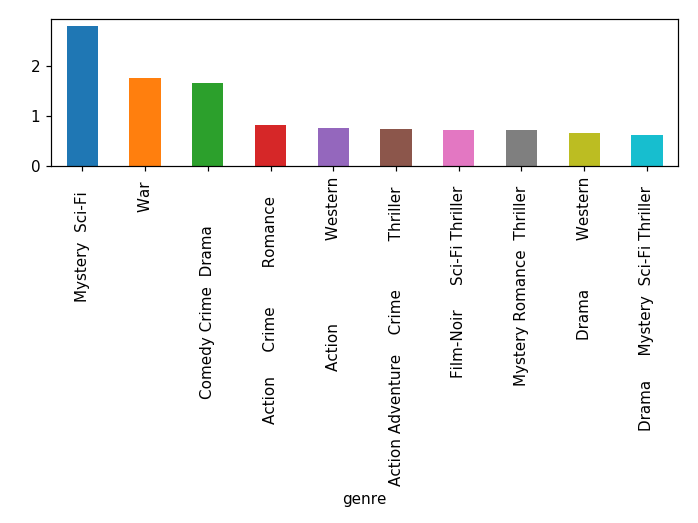

In [114]:
# Top 10 genres highly rated by Males but not by Females 
t_gen.sort_values('diff', ascending=False).head(10)['diff'].plot(kind = 'bar')

In [115]:
# Top 10 genres highly rated by Females but not by Males
t_gen.sort_values('diff').head(10)

sex,F,M,diff
genre,,,
Action Adventure Children's,3.000000,1.000000,-2.000000
Action Crime,4.250000,3.000000,-1.250000
Comedy Fantasy,3.230769,2.181818,-1.048951
Action Adventure Drama Romance,3.782609,2.746032,-1.036577
Action Adventure Children's Fantasy,3.666667,2.714286,-0.952381
Adventure Children's Drama,2.782609,1.865385,-0.917224
Action Adventure Comedy War,3.000000,2.210526,-0.789474
Action Adventure Romance,3.000000,2.285714,-0.714286
Comedy Western,3.200000,2.500000,-0.700000


<IPython.core.display.Javascript object>


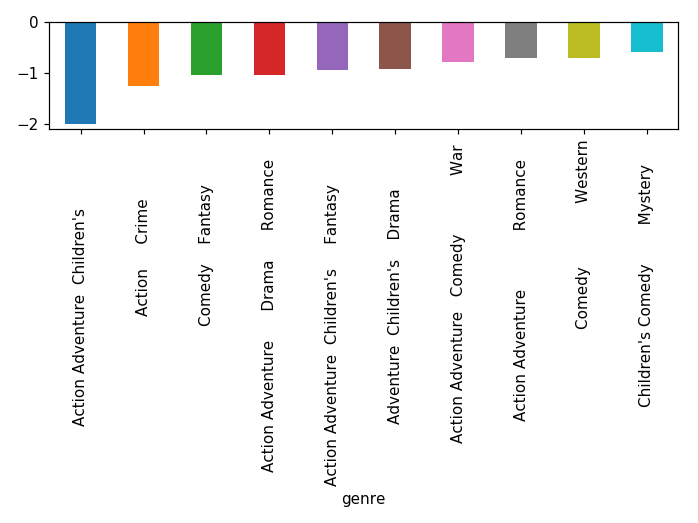

In [116]:
# Top 10 genres highly rated by Females but not by Males
t_gen.sort_values('diff').head(10)['diff'].plot(kind = 'bar')

### 5.2.7 Rating vs Title

In [117]:
dff = z[['movie_id', 'title', 'rating']]
dff.head()

,movie_id,title,rating
0,242,Kolya (1996),5
1,51,Legends of the Fall (1994),4
2,265,"Hunt for Red October, The (1990)",4
3,86,"Remains of the Day, The (1993)",5
4,257,Men in Black (1997),4


In [118]:
dff_1 = dff.groupby('title').agg([np.mean, np.size])

In [119]:
dff_1.head()

movie_id         rating     
                              mean size      mean size
title                                                 
'Til There Was You (1997)   1300.0    9  2.333333    9
1-900 (1994)                1353.0    5  2.600000    5
101 Dalmatians (1996)        225.0  109  2.908257  109
12 Angry Men (1957)          178.0  125  4.344000  125
187 (1997)                   330.0   41  3.024390   41

In [120]:
dff_1.drop('movie_id', axis = 1).head()

rating     
                               mean size
title                                   
'Til There Was You (1997)  2.333333    9
1-900 (1994)               2.600000    5
101 Dalmatians (1996)      2.908257  109
12 Angry Men (1957)        4.344000  125
187 (1997)                 3.024390   41

** 5.2.6.1 High rated movies (by rating)**

<IPython.core.display.Javascript object>


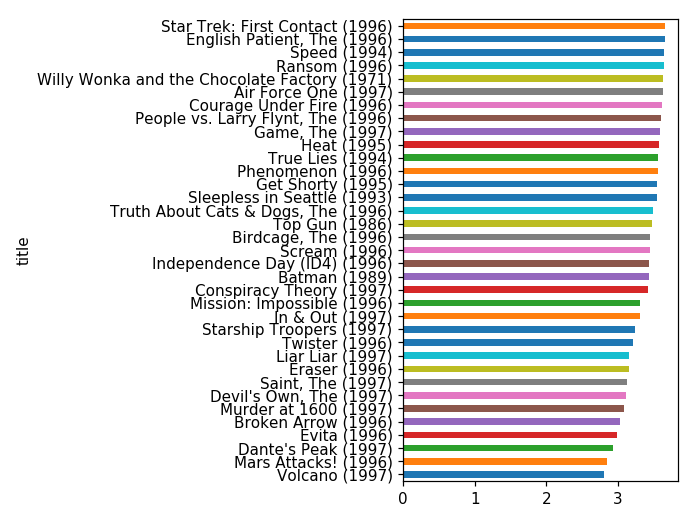

In [121]:
dff_1[dff_1['rating']['size']> 200]['rating']['mean'].sort_values(ascending = True).head(35).plot(kind = 'barh')

** 5.2.6.2 Low rated movies (by rating)**

<IPython.core.display.Javascript object>


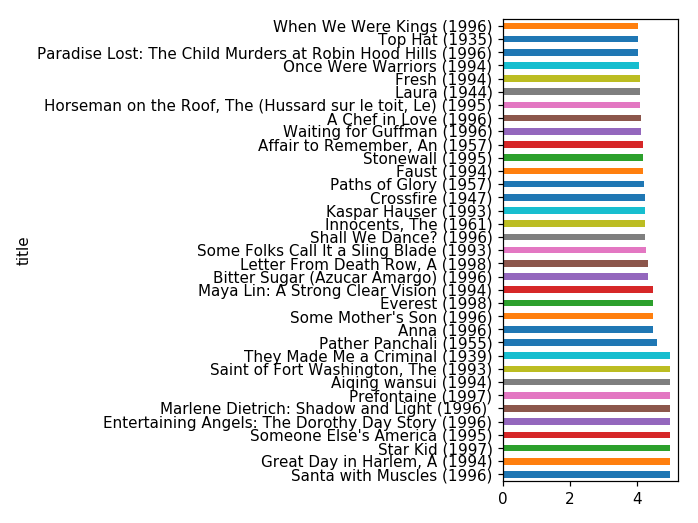

In [122]:
dff_1[dff_1['rating']['size'] < 50]['rating']['mean'].sort_values(ascending = False).head(35).plot(kind = 'barh')

### 5.2.8 Ratings vs User - Cumulative Density Function 

In [123]:
movies_per_user = zz.groupby(by='user_id')['rating'].count()

In [124]:
movies_per_user = movies_per_user.sort_values(ascending=False)
movies_per_user.head()

user_id
405    737
655    685
13     636
450    540
276    518
Name: rating, dtype: int64

<IPython.core.display.Javascript object>


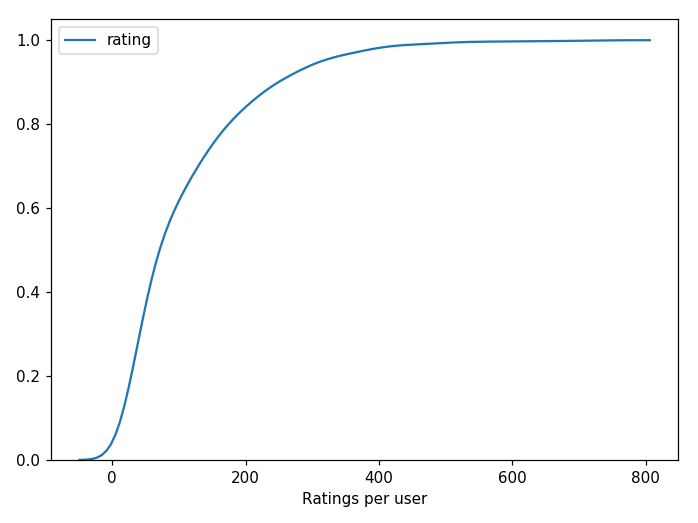

Text(0.5,0,'Ratings per user')

In [125]:
# Cumulative Density Function
sns.kdeplot(movies_per_user, cumulative = True)
plt.xlabel('Ratings per user')

** Interpretation:** 82% of the users have made less than 200 ratings while 18% of the users have rated more than 200 of them. 

## 6. Transformations

In [126]:
zz.head()

,user_id,age,sex,occupation,zip_code,movie_id,rating,timestamp,title,release_date,video_release_date,imdb_url,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,24,M,technician,85711,242,above_avg,889751633,Kolya,24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,24,M,technician,85711,51,above_avg,878543275,Legends of the Fall,01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Legends%20of%...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1
2,1,24,M,technician,85711,265,above_avg,878542441,"Hunt for Red October, The",01-Jan-1990,NaN,http://us.imdb.com/M/title-exact?Hunt+for+Red+...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1,24,M,technician,85711,86,above_avg,878543541,"Remains of the Day, The",01-Jan-1993,NaN,http://us.imdb.com/M/title-exact?Remains%20of%...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,1,24,M,technician,85711,257,above_avg,874965954,Men in Black,04-Jul-1997,NaN,http://us.imdb.com/M/title-exact?Men+in+Black+...,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [127]:
# Function to categorize 'rating'
def transformation_3(df):
    df['occupation'].replace(['student', 'other', 'educator', 'engineer', 'programmer', 'administrator', 'writer', 'librarian', 'technician', 'executive', 'healthcare', 'artist', 'entertainment', 'scientist', 'marketing', 'retired', 'lawyer', 'none', 'salesman', 'doctor', 'homemaker'],
                         ['category_1', 'category_2', 'category_2', 'category_2', 'category_2', 'category_2', 'category_3', 'category_3', 'category_4', 'category_4', 'category_4', 'category_4', 'category_4', 'category_4', 'category_5', 'category_5', 'category_5', 'category_5', 'category_5', 'category_5', 'category_5'], 
                      inplace = True)

In [128]:
transformation_3(zz)

In [129]:
zz['occupation'].head()

0    category_4
1    category_4
2    category_4
3    category_4
4    category_4
Name: occupation, dtype: object

## 7. Content Based Recommendation System

### Code - Version 1

In [285]:
# Build a 1-dimensional array with movie titles
titles = td['title']
indices = pd.Series(td.index, index=td['title'])

In [286]:
td.head()

,age,sex,rating,title,genre
0,24,M,5,Kolya,Comedy
1,24,M,4,Legends of the Fall,Drama Romance War Western
2,24,M,4,"Hunt for Red October, The",Action Thriller
3,24,M,5,"Remains of the Day, The",Drama
4,24,M,4,Men in Black,Action Adventure Comedy Sci-Fi


In [287]:
td['genre'] = td['genre'].fillna(" ").astype('str')

In [288]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer().fit_transform(td['genre'])
tfidf.shape

(100000, 21)

In [289]:
tfidf

<100000x21 sparse matrix of type '<class 'numpy.float64'>'
	with 227058 stored elements in Compressed Sparse Row format>

In [290]:
from sklearn.metrics.pairwise import linear_kernel
cosine_similarities = linear_kernel(tfidf)

MemoryError: 

## Collaborative Filtering Recommendation Model

In [159]:
ratings.head()

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [162]:
# Randomly sample 1% of the ratings dataset
sample_data = ratings.sample(frac=0.02)

In [163]:
sample_data.head()

,user_id,movie_id,rating,timestamp
73905,8,510,4,879362233
88606,58,223,5,884305150
95609,936,825,4,886832502
43519,608,702,1,880406862
27636,317,748,5,891446843


In [165]:
sample_data.shape

(2000, 4)

In [168]:
from sklearn import model_selection

In [171]:
from sklearn import cross_validation as cv
train_data, test_data = cv.train_test_split(small_data, test_size=0.2)

In [193]:
# Create two user-item matrices, one for training and another for testing
train_data_matrix = train_data[['user_id', 'movie_id', 'rating']].values
test_data_matrix = test_data[['user_id', 'movie_id', 'rating']].values

In [179]:
# Check their shape
print(train_data_matrix.shape)
print(test_data_matrix.shape)

(1600, 3)
(400, 3)


In [204]:
from sklearn.metrics.pairwise import pairwise_distances

In [210]:
pairwise_distances(train_data, metric='correlation')[:2][:2]

array([[  0.00000000e+00,   1.15463195e-14,   1.70974346e-14, ...,
          1.67532654e-13,   6.22835117e-13,   2.57571742e-14],
       [  1.15463195e-14,   0.00000000e+00,   5.01820807e-14, ...,
          1.23789867e-13,   6.40709708e-13,   3.47499807e-14]])

In [211]:
1 - pairwise_distances(train_data, metric='correlation')[:2][:2]

array([[ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.]])

In [212]:
# User Similarity Matrix
user_correlation = 1 - pairwise_distances(train_data, metric='correlation')

In [213]:
print(user_correlation[:4, :4])

[[ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]]


In [207]:
user_correlation[np.isnan(user_correlation)] = 0

In [208]:
print(user_correlation[:4, :4])

[[ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]]


In [180]:
# User Similarity Matrix
user_correlation = 1 - pairwise_distances(train_data, metric='correlation')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation[:4, :4])

[[ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]]


In [300]:
train_data_matrix

array([[ 345,   12,    5],
       [ 500,   49,    4],
       [ 230,   97,    5],
       ..., 
       [ 864,  578,    3],
       [ 634, 1162,    1],
       [ 432,  255,    5]], dtype=int64)

In [299]:
train_data_matrix.T

array([[ 345,  500,  230, ...,  864,  634,  432],
       [  12,   49,   97, ...,  578, 1162,  255],
       [   5,    4,    5, ...,    3,    1,    5]], dtype=int64)

In [181]:
# Item Similarity Matrix
item_correlation = 1 - pairwise_distances(train_data_matrix.T, metric='correlation')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation[:4, :4])

[[ 1.          0.00288541 -0.01119268]
 [ 0.00288541  1.         -0.18799895]
 [-0.01119268 -0.18799895  1.        ]]


### Code - Version 2

In [308]:
# Using Collabrative Filtering
movies_cateogary = movies.columns[6:]

In [309]:
movies_cateogary

Index(['Action', 'Adventure', 'Animation', 'Children's', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'], dtype='object')

In [303]:
movies.loc[0]

movie_id                                                              1
title                                                  Toy Story (1995)
release_date                                                01-Jan-1995
video_release_date                                                  NaN
imdb_url              http://us.imdb.com/M/title-exact?Toy%20Story%2...
unknown                                                               0
Action                                                                0
Adventure                                                             0
Animation                                                             1
Children's                                                            1
Comedy                                                                1
Crime                                                                 0
Documentary                                                           0
Drama                                                           

In [310]:
def dot_product(vector1,vector2):
    return sum([ i*j for i,j in zip(vector1, vector2)])

In [311]:
def movie_score(movie_features,user_preferences):
    return dot_product(movie_features, user_preferences)

In [312]:
# Toy Story Movie Featrues
ts_f = movies.loc[0][6:]
ts_f

Action         0
Adventure      0
Animation      1
Children's     1
Comedy         1
Crime          0
Documentary    0
Drama          0
Fantasy        0
Film-Noir      0
Horror         0
Musical        0
Mystery        0
Romance        0
Sci-Fi         0
Thriller       0
War            0
Western        0
Name: 0, dtype: object

In [313]:
from collections import OrderedDict
##Manually using preferences for some user , we can change it according to our needs 
user_preferences = OrderedDict(zip(movies_cateogary, []))

In [ ]:
ts_user_predicted_score = dot_product(ts_f, user_preferences.values())  
ts_user_predicted_score

In [316]:
ratings.head(1)

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949


In [317]:
td.head(1)

,age,sex,rating,title,genre
0,24,M,5,Kolya,Comedy


In [322]:
new_z = z[['user_id', 'rating', 'title']]

In [323]:
# Format 'title' i.e. remove 'year' from title
new_z['title'] = new_z['title'].astype(str).str[:-7]

C:\Users\Nishu\Anaconda3\Lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [324]:
new_z

,user_id,rating,title
0,1,5,Kolya
1,1,4,Legends of the Fall
2,1,4,"Hunt for Red October, The"
3,1,5,"Remains of the Day, The"
4,1,4,Men in Black
5,1,4,Star Trek: First Contact
6,1,3,"To Wong Foo, Thanks for Everything! Julie Newmar"
7,1,1,Batman Forever
8,1,4,Die Hard
9,1,3,Twister


In [325]:
ratings_mtx = new_z.pivot_table(values='rating', index='user_id', columns='title')

In [ ]:

ratings_mtx_df.fillna(0, inplace=True)

movie_index = ratings_mtx_df.columns

ratings_mtx_df.head() 

### Version - 3

In [328]:
ratings_matrix = ratings.pivot_table(index=['movie_id'],columns=['user_id'],values='rating').reset_index(drop=True)

In [329]:
ratings_matrix.head()

user_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,...,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943
0,5.0,4.0,NaN,NaN,4.0,4.0,NaN,NaN,NaN,4.0,NaN,NaN,3.0,NaN,1.0,5.0,4.0,5.0,NaN,3.0,5.0,NaN,5.0,NaN,5.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,4.0,5.0,5.0,4.0,5.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,4.0,5.0,5.0,2.0,NaN,NaN,2.0,3.0,4.0,3.0,3.0,3.0,NaN,NaN,4.0,NaN,4.0,2.0,NaN,4.0,NaN,5.0,NaN,4.0,NaN,4.0,4.0,4.0,2.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,4.0,5.0,4.0,5.0,5.0,4.0,NaN,4.0,NaN,3.0,3.0,NaN,NaN,NaN,4.0,NaN,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,4.0,4.0,NaN,NaN,3.0,4.0,NaN,NaN,4.0,NaN,5.0,4.0,NaN,NaN,5.0,NaN,NaN,3.0,4.0,NaN,NaN,3.0,NaN,NaN,4.0,3.0,NaN,NaN,4.0,NaN,4.0,5.0,NaN,NaN,NaN,NaN,NaN,5.0,4.0,NaN,4.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,3.0,4.0,NaN,NaN,3.0,4.0,NaN,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,4.0,4.0,NaN,NaN,NaN,4.0,1.0,5.0,3.0,3.0,3.0,2.0,NaN,NaN,NaN,NaN,5.0,5.0,NaN,NaN,2.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,3.0,4.0,NaN,3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,4.0,NaN,4.0,4.0,3.0,4.0,4.0,...,NaN,NaN,NaN,5.0,4.0,3.0,NaN,4.0,NaN,4.0,NaN,5.0,4.0,NaN,5.0,4.0,4.0,NaN,NaN,NaN,3.0,5.0,5.0,NaN,NaN,NaN,NaN,5.0,NaN,3.0,NaN,NaN,4.0,3.0,NaN,NaN,4.0,2.0,NaN,2.0,NaN,4.0,NaN,NaN,5.0,NaN,NaN,NaN,4.0,NaN,4.0,2.0,4.0,5.0,4.0,4.0,NaN,3.0,NaN,NaN,NaN,NaN,4.0,4.0,NaN,5.0,NaN,1.0,NaN,4.0,4.0,NaN,NaN,5.0,5.0,4.0,5.0,5.0,NaN,3.0,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,4.0,4.0,NaN,3.0,3.0,3.0,NaN,4.0,4.0,4.0,4.0,2.0,NaN,4.0,NaN,4.0,NaN,NaN,NaN,5.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,4.0,NaN,NaN,NaN,5.0,4.0,4.0,NaN,NaN,4.0,NaN,NaN,4.0,4.0,4.0,NaN,NaN,NaN,3.0,NaN,NaN,5.0,4.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,1.0,NaN,4.0,4.0,NaN,5.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,4.0,5.0,3.0,NaN,5.0,4.0,5.0,NaN,3.0,4.0,NaN,5.0,5.0,4.0,4.0,4.0,5.0,NaN,3.0,NaN,5.0,5.0,3.0,NaN,NaN,NaN,5.0,NaN,NaN,4.0,NaN,NaN,2.0,NaN,NaN,4.0,3.0,3.0,4.0,NaN,3.0,5.0,3.0,5.0,NaN,NaN,5.0,NaN,3.0,3.0,NaN,4.0,3.0,2.0,3.0,4.0,NaN,4.0,NaN,NaN,5.0,NaN,NaN
1,3.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,

In [330]:
ratings_matrix.fillna(0, inplace = True)

In [331]:
ratings_matrix.head()

user_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,...,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943
0,5.0,4.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,3.0,0.0,1.0,5.0,4.0,5.0,0.0,3.0,5.0,0.0,5.0,0.0,5.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,5.0,5.0,4.0,5.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,5.0,5.0,2.0,0.0,0.0,2.0,3.0,4.0,3.0,3.0,3.0,0.0,0.0,4.0,0.0,4.0,2.0,0.0,4.0,0.0,5.0,0.0,4.0,0.0,4.0,4.0,4.0,2.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,5.0,4.0,5.0,5.0,4.0,0.0,4.0,0.0,3.0,3.0,0.0,0.0,0.0,4.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,4.0,4.0,0.0,0.0,3.0,4.0,0.0,0.0,4.0,0.0,5.0,4.0,0.0,0.0,5.0,0.0,0.0,3.0,4.0,0.0,0.0,3.0,0.0,0.0,4.0,3.0,0.0,0.0,4.0,0.0,4.0,5.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,0.0,4.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,3.0,4.0,0.0,0.0,3.0,4.0,0.0,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,4.0,1.0,5.0,3.0,3.0,3.0,2.0,0.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0,2.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,3.0,4.0,0.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,4.0,0.0,4.0,4.0,3.0,4.0,4.0,...,0.0,0.0,0.0,5.0,4.0,3.0,0.0,4.0,0.0,4.0,0.0,5.0,4.0,0.0,5.0,4.0,4.0,0.0,0.0,0.0,3.0,5.0,5.0,0.0,0.0,0.0,0.0,5.0,0.0,3.0,0.0,0.0,4.0,3.0,0.0,0.0,4.0,2.0,0.0,2.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,0.0,4.0,0.0,4.0,2.0,4.0,5.0,4.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,5.0,0.0,1.0,0.0,4.0,4.0,0.0,0.0,5.0,5.0,4.0,5.0,5.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,3.0,3.0,3.0,0.0,4.0,4.0,4.0,4.0,2.0,0.0,4.0,0.0,4.0,0.0,0.0,0.0,5.0,4.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,4.0,0.0,0.0,0.0,5.0,4.0,4.0,0.0,0.0,4.0,0.0,0.0,4.0,4.0,4.0,0.0,0.0,0.0,3.0,0.0,0.0,5.0,4.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.0,4.0,4.0,0.0,5.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,4.0,5.0,3.0,0.0,5.0,4.0,5.0,0.0,3.0,4.0,0.0,5.0,5.0,4.0,4.0,4.0,5.0,0.0,3.0,0.0,5.0,5.0,3.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,0.0,2.0,0.0,0.0,4.0,3.0,3.0,4.0,0.0,3.0,5.0,3.0,5.0,0.0,0.0,5.0,0.0,3.0,3.0,0.0,4.0,3.0,2.0,3.0,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0
1,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,

<div class="alert alert-warning">
  <strong>Why do we have to subtract 1 from  `pairwise-distances`! <br> We can use the pair-wise distances and sort them ascendingly, isn't it?</strong> 
</div>

** Cosine Similarity **

In [338]:
movie_similarity_1 = 1 - pairwise_distances(ratings_matrix.values, metric="cosine")
np.fill_diagonal(movie_similarity_1, 0) 
ratings_matrix_1 = pd.DataFrame(movie_similarity_1)

In [339]:
ratings_matrix_1.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,...,1432,1433,1434,1435,1436,1437,1438,1439,1440,1441,1442,1443,1444,1445,1446,1447,1448,1449,1450,1451,1452,1453,1454,1455,1456,1457,1458,1459,1460,1461,1462,1463,1464,1465,1466,1467,1468,1469,1470,1471,1472,1473,1474,1475,1476,1477,1478,1479,1480,1481,1482,1483,1484,1485,1486,1487,1488,1489,1490,1491,1492,1493,1494,1495,1496,1497,1498,1499,1500,1501,1502,1503,1504,1505,1506,1507,1508,1509,1510,1511,1512,1513,1514,1515,1516,1517,1518,1519,1520,1521,1522,1523,1524,1525,1526,1527,1528,1529,1530,1531,1532,1533,1534,1535,1536,1537,1538,1539,1540,1541,1542,1543,1544,1545,1546,1547,1548,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558,1559,1560,1561,1562,1563,1564,1565,1566,1567,1568,1569,1570,1571,1572,1573,1574,1575,1576,1577,1578,1579,1580,1581,1582,1583,1584,1585,1586,1587,1588,1589,1590,1591,1592,1593,1594,1595,1596,1597,1598,1599,1600,1601,1602,1603,1604,1605,1606,1607,1608,1609,1610,1611,1612,1613,1614,1615,1616,1617,1618,1619,1620,1621,1622,1623,1624,1625,1626,1627,1628,1629,1630,1631,1632,1633,1634,1635,1636,1637,1638,1639,1640,1641,1642,1643,1644,1645,1646,1647,1648,1649,1650,1651,1652,1653,1654,1655,1656,1657,1658,1659,1660,1661,1662,1663,1664,1665,1666,1667,1668,1669,1670,1671,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681
0,0.000000,0.997039,0.997689,0.997910,0.996733,0.962146,0.998568,0.997340,0.997408,0.993006,0.998487,0.998082,0.995471,0.989970,0.998601,0.992954,0.996548,0.949126,0.982047,0.985209,0.997361,0.998327,0.994417,0.997996,0.998633,0.994888,0.995405,0.997991,0.994498,0.976923,0.998385,0.990111,0.997163,0.996416,0.970524,0.982128,0.983863,0.995084,0.997878,0.995919,0.990529,0.997945,0.996788,0.997911,0.987819,0.988850,0.995609,0.995682,0.997120,0.998614,0.997540,0.992133,0.997212,0.997036,0.998090,0.998082,0.986917,0.997246,0.987911,0.987988,0.988447,0.995565,0.993664,0.997997,0.997466,0.997393,0.993814,0.996412,0.997997,0.997329,0.997837,0.997084,0.996435,0.993298,0.972525,0.995848,0.998125,0.990529,0.998279,0.993985,0.996593,0.997825,0.997049,0.992497,0.996666,0.993286,0.997831,0.997696,0.997187,0.995474,0.997547,0.997495,0.994384,0.994890,0.997921,0.998234,0.997695,0.997865,0.997122,0.997762,0.996335,0.995132,0.995975,0.985784,0.994165,0.997959,0.997566,0.997585,0.998061,0.991268,0.998449,0.993690,0.947385,0.996344,0.996776,0.991138,0.998450,0.998171,0.974817,0.995303,0.998707,0.997329,0.997212,0.994080,0.998160,0.996411,0.997549,0.996225,0.993892,0.992979,0.990589,0.996785,0.994317,0.993024,0.995721,0.992942,0.991888,0.987568,0.994517,0.995029,0.995460,0.995188,0.997498,0.998384,0.996416,0.980029,0.997636,0.997784,0.969232,0.997145,0.998782,0.993196,0.997339,0.997127,0.997631,0.997844,0.997607,0.995560,0.997750,0.995062,0.997779,0.994240,0.995504,0.998142,0.985820,0.986805,0.996755,0.997714,0.996867,0.988785,0.992067,0.998104,0.998008,0.997985,0.995100,0.998005,0.996792,0.993393,0.995978,0.996113,0.998757,0.997254,0.997612,0.996844,0.996065,0.997349,0.996029,0.997507,0.996492,0.992644,0.996552,0.993341,0.996346,0.995845,0.997974,0.997734,0.993670,0.994572,0.993624,0.997683,0.997139,0.998050,0.997535,0.998011,0.993634,0.997432

In [382]:
# Input Movie
input_movie = movies.title[1]
print("Input Provided - ", input_movie)

# Get the index of the movie
inp = movies[movies['title'] == input_movie].index.tolist()[0]
print()
print("Index of the movie - ",inp)

# Create a column 'similarity' with the each similarity ratings of every other movie with the 'input-movie'
mv['similarity'] = ratings_matrix_1.iloc[inp]
print()
print("Most Similar Movies")
print(mv.sort_values(["similarity"], ascending = False )[1:10])

Input Provided -  GoldenEye (1995)

Index of the movie -  1

Most Similar Movies
     movie_id                                 title  similarity
549       550     Die Hard: With a Vengeance (1995)    0.998772
745       746                    Real Genius (1985)    0.998741
225       226                     Die Hard 2 (1990)    0.998679
230       231                 Batman Returns (1992)    0.998668
53         54                       Outbreak (1995)    0.998640
32         33                      Desperado (1995)    0.998636
575       576                    Cliffhanger (1993)    0.998633
448       449  Star Trek: The Motion Picture (1979)    0.998618
384       385                      True Lies (1994)    0.998595


C:\Users\Nishu\Anaconda3\Lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


** Euclidean Similarity **

In [389]:
movie_similarity_2 = 1 - pairwise_distances(ratings_matrix.values, metric="euclidean")
np.fill_diagonal(movie_similarity_2, 0) 
ratings_matrix_2 = pd.DataFrame(movie_similarity_2)

In [390]:
# Input Movie
input_movie = movies.title[1]
print("Input Provided - ", input_movie)

# Get the index of the movie
inp = movies[movies['title'] == input_movie].index.tolist()[0]
print()
print("Index of the movie - ",inp)

# Create a column 'similarity' with the each similarity ratings of every other movie with the 'input-movie'
mv['similarity'] = ratings_matrix_2.iloc[inp]
print()
print("Most Similar Movies")
print(mv.sort_values(["similarity"], ascending = False )[1:10])

Input Provided -  GoldenEye (1995)

Index of the movie -  1

Most Similar Movies
     movie_id                              title  similarity
48         49                        I.Q. (1994)   -0.412591
32         33                   Desperado (1995)   -0.412714
53         54                    Outbreak (1995)   -0.412820
549       550  Die Hard: With a Vengeance (1995)   -0.412933
232       233                 Under Siege (1992)   -0.412975
568       569                        Wolf (1994)   -0.413204
183       184            Army of Darkness (1993)   -0.413298
225       226                  Die Hard 2 (1990)   -0.413608
216       217       Bram Stoker's Dracula (1992)   -0.413742


C:\Users\Nishu\Anaconda3\Lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


** Manhattan Distance **

In [391]:
movie_similarity_3 = 1 - pairwise_distances(ratings_matrix.values, metric="manhattan")
np.fill_diagonal(movie_similarity_3, 0) 
ratings_matrix_3 = pd.DataFrame(movie_similarity_3)

In [392]:
# Input Movie
input_movie = movies.title[1]
print("Input Provided - ", input_movie)

# Get the index of the movie
inp = movies[movies['title'] == input_movie].index.tolist()[0]
print()
print("Index of the movie - ",inp)

# Create a column 'similarity' with the each similarity ratings of every other movie with the 'input-movie'
mv['similarity'] = ratings_matrix_3.iloc[inp]
print()
print("Most Similar Movies")
print(mv.sort_values(["similarity"], ascending = False )[1:10])

Input Provided -  GoldenEye (1995)

Index of the movie -  1

Most Similar Movies
     movie_id                              title  similarity
53         54                    Outbreak (1995)   -1.974989
549       550  Die Hard: With a Vengeance (1995)   -1.983540
48         49                        I.Q. (1994)   -1.989231
32         33                   Desperado (1995)   -1.993987
232       233                 Under Siege (1992)   -2.170507
568       569                        Wolf (1994)   -2.620389
183       184            Army of Darkness (1993)   -2.777930
225       226                  Die Hard 2 (1990)   -2.992242
230       231              Batman Returns (1992)   -3.062584


C:\Users\Nishu\Anaconda3\Lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


** Pearson Correlation **

In [394]:
movie_similarity_4 = 1 - pairwise_distances(ratings_matrix.values, metric="correlation")
np.fill_diagonal(movie_similarity_4, 0) 
ratings_matrix_4 = pd.DataFrame(movie_similarity_4)

In [395]:
# Input Movie
input_movie = movies.title[1]
print("Input Provided - ", input_movie)

# Get the index of the movie
inp = movies[movies['title'] == input_movie].index.tolist()[0]
print()
print("Index of the movie - ",inp)

# Create a column 'similarity' with the each similarity ratings of every other movie with the 'input-movie'
mv['similarity'] = ratings_matrix_4.iloc[inp]
print()
print("Most Similar Movies")
print(mv.sort_values(["similarity"], ascending = False )[1:10])

Input Provided -  GoldenEye (1995)

Index of the movie -  1

Most Similar Movies
      movie_id                                 title  similarity
1626      1627                      Wife, The (1995)    0.920049
1466      1467  Saint of Fort Washington, The (1993)    0.919636
1442      1443                      8 Seconds (1994)    0.919588
101        102                Aristocats, The (1970)    0.919405
1302      1303                   Getaway, The (1994)    0.919312
1409      1410                         Harlem (1993)    0.919297
1284      1285               Princess Caraboo (1994)    0.919293
950        951    Indian in the Cupboard, The (1995)    0.919201
100        101                    Heavy Metal (1981)    0.919156


C:\Users\Nishu\Anaconda3\Lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


** Note:** The movies returned by the recommendation system with `cosine`, `euclidean` and `manhattan distance` are quite similar to each other. However, they are not so much when the recommendation system uses `pearson correlation`.

### Suggestions for Content-Based filtering from other data scietists I met during the meet-up:

1. Use weighted average on each movie:
    - How about multiplying `rating count` and `average rating`.

2. Since, dataset is with 100k records; work on Top 25%, Middle 50% and Bottom 25% of the records on the weighted scale.

3. Use metadata td-idf matrix (cosine similarity) rather than just the movies.

4. Also you can scrap the description of the movies from IMDB and use that as part of the 'Corpus'.

5. Try 'Movie Cast', 'Director' and 'Production'

6. For collaborative filtering - try 'movie-movie' similarity and 'user-user' similarity (Computationally Expensive)

7. Try to build a Hybrid Recommender